In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import math

In [2]:
# List of 50 stocks
tickers = [
    "AAPL", "MSFT", "GOOGL", "AMZN", "TSLA", "NVDA", "META", "BRK-B", "JPM", "V",
    "UNH", "JNJ", "XOM", "PG", "HD", "MA", "CVX", "ABBV", "PEP", "LLY",
    "KO", "MRK", "AVGO", "COST", "MCD", "TMO", "DIS", "CSCO", "ACN", "AMD",
    "CMCSA", "ADBE", "NFLX", "PFE", "DHR", "NKE", "TXN", "LIN", "UNP", "INTC",
    "HON", "IBM", "PM", "CAT", "GE", "NOW", "GS", "BLK", "AXP", "DE"
]

# Download historical data for the past 1 month
# Data is a multi-indexed dataframe with ohlc on the first row and the stock ticker on the second row.
data = yf.download(tickers, period="1y", interval="1d")

[***                    6%%                      ]  3 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages

[******                12%%                      ]  6 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages

[***********           22%%                      ]  11 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages

[**************        30%%                      ]  15 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages

[******************    38%%                      ]  19 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages

[**********************46%%                      ]  23 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages

[**********************52%%                      ]  26 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[**********************60%%***                   ]  30 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages

[**********************68%%*******               ]  34 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages

[**********************76%%**********            ]  38 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages

[**********************82%%*************         ]  41 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages

[**********************92%%******************    ]  46 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages

[*********************100%%**********************]  50 of 50 completed


/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [3]:
data.head()

Adj Close                                                  \
                  AAPL        ABBV         ACN        ADBE         AMD   
Date                                                                     
2024-02-12  186.270447  166.987061  362.937347  611.840027  171.910004   
2024-02-13  184.170364  167.199326  358.373840  601.890015  171.539993   
2024-02-14  183.284561  168.289612  366.443939  604.659973  178.699997   
2024-02-15  182.995926  170.383331  366.967468  590.440002  176.759995   
2024-02-16  181.453217  171.251709  364.962280  546.659973  173.869995   

                                                                        ...  \
                  AMZN        AVGO         AXP         BLK       BRK-B  ...   
Date                                                                    ...   
2024-02-12  172.339996  124.818779  209.932556  783.060974  397.709991  ...   
2024-02-13  168.639999  123.501518  207.370941  759.923523  394.799988  ...   
2024-02-14  170.979996  124.544479  208.587463  767.082581  398.679993  ...   
2024-02-15  169.800003  124.825691  210.199585  779.437500  403.450012  ...   
2024-02-16  169.509995  122.892715  210.229263  775.481934  405.989990  ...   

              Volume                                                          \
                 PFE       PG       PM      TMO       TSLA      TXN      UNH   
Date                                                                           
2024-02-12  30323700  5482000  4022300  1073000   95498600  3853000  3194000   
2024-02-13  37927500  6046800  5935300  1268000   86759500  5357900  3436000   
2024-02-14  25270200  5727300  5534900  1297000   81203000  4528000  1918500   
2024-02-15  36111600  6249200  8765600  1519000  120831800  3725300  2292100   
2024-02-16  35913500  6617600  4382200  1028200  111173600  3167600  2135500   

                                        
                UNP        V       XOM  
Date                                    
2024-02-12  2259600  3676200  18173100  
2024-02-13  2664100  5493800  18917400  
2024-02-14  2579500  4218400  17651300  
2024-02-15  2252300  4834800  23196300  
2024-02-16  2201300  6630100  20146700  

[5 rows x 300 columns]

In [4]:
# summary statistics of 'data' dataframe
data.describe()

Adj Close                                                              \
             AAPL        ABBV         ACN        ADBE         AMD        AMZN   
count  250.000000  250.000000  250.000000  250.000000  250.000000  250.000000   
mean   211.554380  175.329640  338.649514  506.329759  153.107120  192.368920   
std     25.956222   12.382376   28.361685   44.949568   21.184573   19.388714   
min    164.224564  150.744324  279.392517  405.920013  107.559998  161.020004   
25%    185.805523  165.559227  314.180183  476.017509  138.652496  179.055000   
50%    221.951508  173.439499  343.247742  504.540009  154.529999  186.270004   
75%    229.223007  187.541847  361.065002  544.402527  165.795002  200.000000   
max    258.735504  201.965424  398.250000  611.840027  211.380005  242.059998   

                                                        ...        Volume  \
             AVGO         AXP          BLK       BRK-B  ...           PFE   
count  250.000000  250.000000   250.000000  250.000000  ...  2.500000e+02   
mean   163.635425  255.750081   882.356559  436.304121  ...  3.807049e+07   
std     33.320028   32.606400   106.830057   25.912341  ...  1.581170e+07   
min    119.376144  207.370941   734.400391  394.799988  ...  1.518010e+07   
25%    135.103645  229.633766   785.978088  409.552498  ...  2.848030e+07   
50%    161.575775  246.599319   852.271149  439.869995  ...  3.528435e+07   
75%    175.689262  285.052307   995.689957  459.335007  ...  4.392985e+07   
max    249.331955  325.869995  1075.500000  483.079987  ...  1.310744e+08   

                                                                             \
                 PG            PM           TMO          TSLA           TXN   
count  2.500000e+02  2.500000e+02  2.500000e+02  2.500000e+02  2.500000e+02   
mean   6.579047e+06  5.378331e+06  1.553655e+06  9.103926e+07  5.564269e+06   
std    2.761731e+06  2.250245e+06  6.774487e+05  3.310646e+07  2.338223e+06   
min    2.460800e+06  1.647800e+06  4.887000e+05  3.716760e+07  1.950900e+06   
25%    5.047875e+06  3.952200e+06  1.118050e+06  6.805352e+07  4.157300e+06   
50%    6.028300e+06  4.903350e+06  1.397750e+06  8.301860e+07  5.085850e+06   
75%    7.203950e+06  5.984075e+06  1.825050e+06  1.043894e+08  6.214425e+06   
max    2.864750e+07  1.837440e+07  6.150900e+06  2.438697e+08  1.907880e+07   

                                                               
                UNH           UNP             V           XOM  
count  2.500000e+02  2.500000e+02  2.500000e+02  2.500000e+02  
mean   4.106379e+06  2.388562e+06  6.945661e+06  1.582385e+07  
std    2.481658e+06  8.368227e+05  3.704151e+06  5.405419e+06  
min    1.581900e+06  6.690000e+05  2.684100e+06  7.732900e+06  
25%    2.667500e+06  1.819000e+06  4.844700e+06  1.246778e+07  
50%    3.340950e+06  2.247500e+06  5.990700e+06  1.482290e+07  
75%    4.568675e+06  2.795425e+06  7.985950e+06  1.757450e+07  
max    2.273420e+07  6.802600e+06  2.781090e+07  5.222060e+07  

[8 rows x 300 columns]

In [5]:
# Check for missing values and sort in descending format to capture values faster.
data.isnull().sum().sort_values(ascending=False)

Volume     XOM     0
Adj Close  AAPL    0
           ABBV    0
           ACN     0
           ADBE    0
                  ..
           DHR     0
           DE      0
           CVX     0
           CSCO    0
           COST    0
Length: 300, dtype: int64

In [6]:
''' 
returns stores the percentage returns of each of the assets on a daily basis
Alternatively you can use 
returns = df.loc["adj_close"].pct_change() * 100
'''

returns = ((data["Adj Close"] - data["Adj Close"].shift(1)) / data["Adj Close"].shift(1)) * 100
print(returns)

                AAPL      ABBV       ACN      ADBE       AMD      AMZN  \
Date                                                                     
2024-02-12       NaN       NaN       NaN       NaN       NaN       NaN   
2024-02-13 -1.127437  0.127115 -1.257382 -1.626244 -0.215235 -2.146917   
2024-02-14 -0.480969  0.652088  2.251866  0.460210  4.173956  1.387569   
2024-02-15 -0.157479  1.244117  0.142867 -2.351730 -1.085620 -0.690135   
2024-02-16 -0.843029  0.509661 -0.546421 -7.414814 -1.634985 -0.170794   
...              ...       ...       ...       ...       ...       ...   
2025-02-04  2.100787 -0.099928  1.664028  0.371638  4.576882  1.954342   
2025-02-05 -0.141752  0.947619  1.692969 -0.590602 -6.267781 -2.433281   
2025-02-06  0.322622  0.636246 -2.739486 -0.509565 -1.651637  1.126309   
2025-02-07 -2.396879 -1.228168 -0.351109 -0.535137 -2.360209 -4.053095   
2025-02-10  0.118739 -0.136416  0.235764  4.163299  2.714769  1.741220   

                AVGO       AXP       

In [7]:
log_returns = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
print(log_returns)

                AAPL      ABBV       ACN      ADBE       AMD      AMZN  \
Date                                                                     
2024-02-12       NaN       NaN       NaN       NaN       NaN       NaN   
2024-02-13 -0.011338  0.001270 -0.012654 -0.016396 -0.002155 -0.021703   
2024-02-14 -0.004821  0.006500  0.022269  0.004592  0.040892  0.013780   
2024-02-15 -0.001576  0.012364  0.001428 -0.023798 -0.010916 -0.006925   
2024-02-16 -0.008466  0.005084 -0.005479 -0.077041 -0.016485 -0.001709   
...              ...       ...       ...       ...       ...       ...   
2025-02-04  0.020790 -0.001000  0.016503  0.003709  0.044752  0.019355   
2025-02-05 -0.001419  0.009432  0.016788 -0.005924 -0.064728 -0.024634   
2025-02-06  0.003221  0.006342 -0.027777 -0.005109 -0.016654  0.011200   
2025-02-07 -0.024261 -0.012358 -0.003517 -0.005366 -0.023885 -0.041375   
2025-02-10  0.001187 -0.001365  0.002355  0.040790  0.026786  0.017262   

                AVGO       AXP       

In [8]:
# Select 'AAPL' stock data and extract the 'Close' column
close_prices = data['Close']

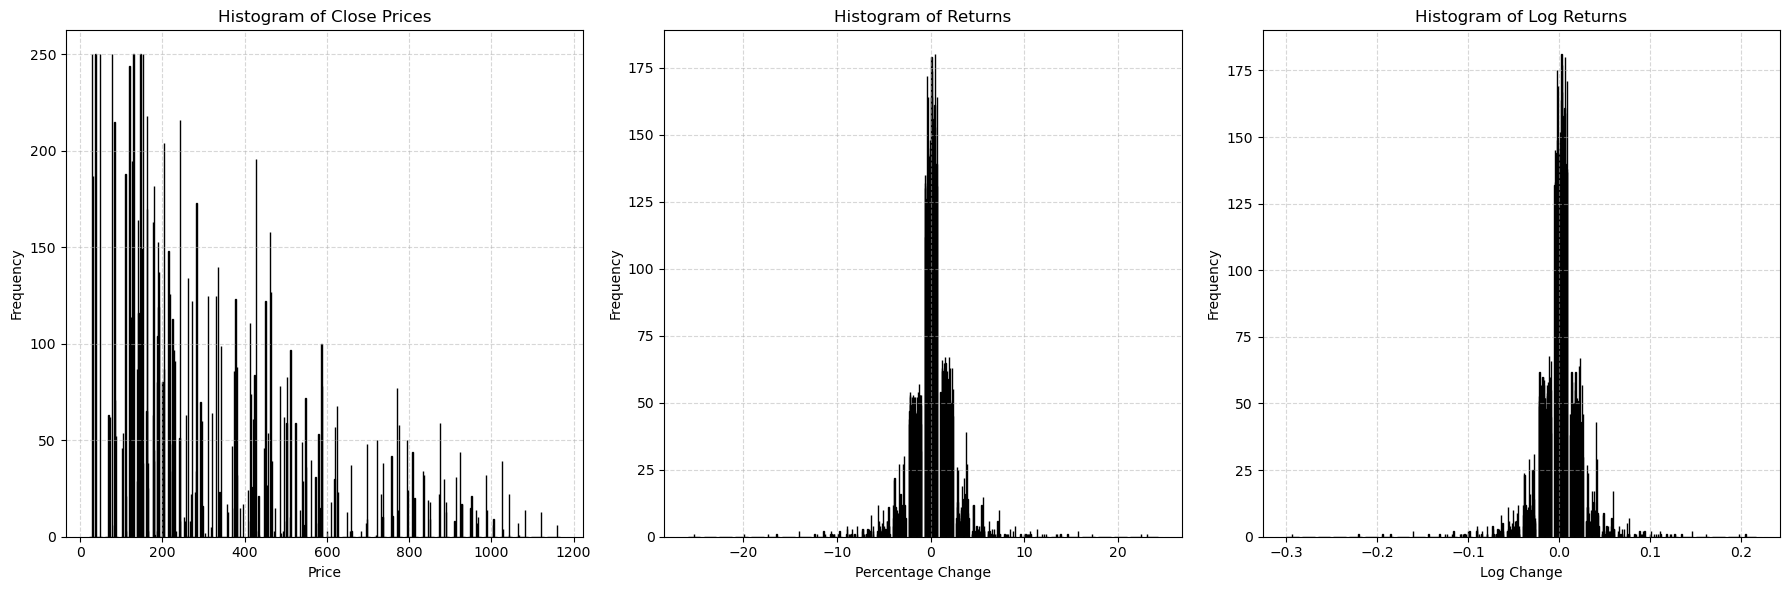

In [9]:
# Create a figure and two subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# First subplot (left side)
axes[0].hist(close_prices, bins=30, edgecolor='black')
axes[0].set_title('Histogram of Close Prices')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')
axes[0].grid(True, linestyle='--', alpha=0.5)

# Second subplot (right side)
axes[1].hist(returns, bins=30, edgecolor='black')
axes[1].set_title('Histogram of Returns')
axes[1].set_xlabel('Percentage Change')
axes[1].set_ylabel('Frequency')
axes[1].grid(True, linestyle='--', alpha=0.5)

# Third subplot (right side)
axes[2].hist(log_returns, bins=30, edgecolor='black')
axes[2].set_title('Histogram of Log Returns')
axes[2].set_xlabel('Log Change')
axes[2].set_ylabel('Frequency')
axes[2].grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlapping of labels
plt.show()

The histograms of adjusted closing prices and percentage returns reveal distinct statistical characteristics of the dataset.

1. Adjusted Closing Prices: The histogram exhibits a right-skewed (positively skewed) distribution, indicating that while most stock prices cluster at lower values, a few stocks have significantly higher prices. This skewness suggests a long right tail, which is characteristic of financial data where a few large-cap stocks (e.g., AMZN, BRK-B) have disproportionately high prices compared to smaller-cap stocks.

2. Percentage Returns: The histogram of daily percentage returns appears approximately normally distributed, with most values concentrated around zero. This suggests that stock returns exhibit symmetry, with gains and losses distributed fairly evenly around the mean. This aligns with the fundamental assumption in many financial models, such as the log-normal distribution of prices and the normality of short-term returns under the Efficient Market Hypothesis.

# Statistical Interpretation:
The right-skewness in prices implies that using raw price values in models can lead to misleading conclusions due to the large variation in scale across stocks.
The near-normal distribution of percentage returns suggests that using returns instead of prices provides a stationary and scale-independent measure of stock performance, making it more suitable for statistical modeling and risk analysis.

---

# Creating New Features
- Daily log returns
- Daily risk (standard deviation)

In [10]:
# Assign back to the original dataframe under a new column level
log_returns.columns = pd.MultiIndex.from_product([['Log Returns'], log_returns.columns])  # Add new top-level index

In [11]:
# Merge with the original dataframe
data = data.join(log_returns)

In [12]:
data['Log Returns'].head()

,AAPL,ABBV,ACN,ADBE,AMD,AMZN,AVGO,AXP,BLK,BRK-B,...,PFE,PG,PM,TMO,TSLA,TXN,UNH,UNP,V,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2024-02-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-13,-0.011338,0.001270,-0.012654,-0.016396,-0.002155,-0.021703,-0.010609,-0.012277,-0.029993,-0.007344,...,-0.025262,-0.005361,-0.009041,-0.015220,-0.022089,-0.026611,-0.001527,-0.007262,0.002686,-0.008646
2024-02-14,-0.004821,0.006500,0.022269,0.004592,0.040892,0.013780,0.008409,0.005849,0.009377,0.009780,...,0.005178,-0.004104,0.000336,0.017795,0.025167,0.006482,0.000174,0.018156,0.006325,-0.004946
2024-02-15,-0.001576,0.012364,0.001428,-0.023798,-0.010916,-0.006925,0.002255,0.007699,0.015978,0.011894,...,0.014647,0.008828,-0.002694,0.000547,0.060353,0.017830,0.007593,0.001758,0.012246,0.028256
2024-02-16,-0.008466,0.005084,-0.005479,-0.077041,-0.016485,-0.001709,-0.015607,0.000141,-0.005088,0.006276,...,0.003990,0.003179,0.007501,-0.001332,-0.002498,-0.002055,0.001285,-0.015932,-0.008650,0.000000


In [13]:
#Calculate the standard deviation of the entire dataset
# std_dev_entire = data['Log Returns'].std().sort_values(ascending=False)
# std_dev_entire.plot(kind='bar', figsize=(12,6))
# plt.title('Population Standard Deviation of Assets')
# plt.xlabel('Assets')
# plt.ylabel('Standard Deviation')
# plt.show()

In [14]:
rolling_std_dev = data['Log Returns'].rolling(window=5).std()
print(rolling_std_dev)

                AAPL      ABBV       ACN      ADBE       AMD      AMZN  \
Date                                                                     
2024-02-12       NaN       NaN       NaN       NaN       NaN       NaN   
2024-02-13       NaN       NaN       NaN       NaN       NaN       NaN   
2024-02-14       NaN       NaN       NaN       NaN       NaN       NaN   
2024-02-15       NaN       NaN       NaN       NaN       NaN       NaN   
2024-02-16       NaN       NaN       NaN       NaN       NaN       NaN   
...              ...       ...       ...       ...       ...       ...   
2025-02-04  0.020202  0.021523  0.011718  0.011067  0.028862  0.012403   
2025-02-05  0.019686  0.020603  0.006976  0.011271  0.041078  0.017689   
2025-02-06  0.020044  0.019885  0.018626  0.009230  0.039185  0.017401   
2025-02-07  0.022129  0.016884  0.018284  0.004753  0.039131  0.025263   
2025-02-10  0.016082  0.008434  0.018302  0.020060  0.043389  0.027616   

                AVGO       AXP       

In [15]:
# Assign back to the original dataframe under a new column level
rolling_std_dev.columns = pd.MultiIndex.from_product([['Daily Risk'], rolling_std_dev.columns])  # Add new top-level index

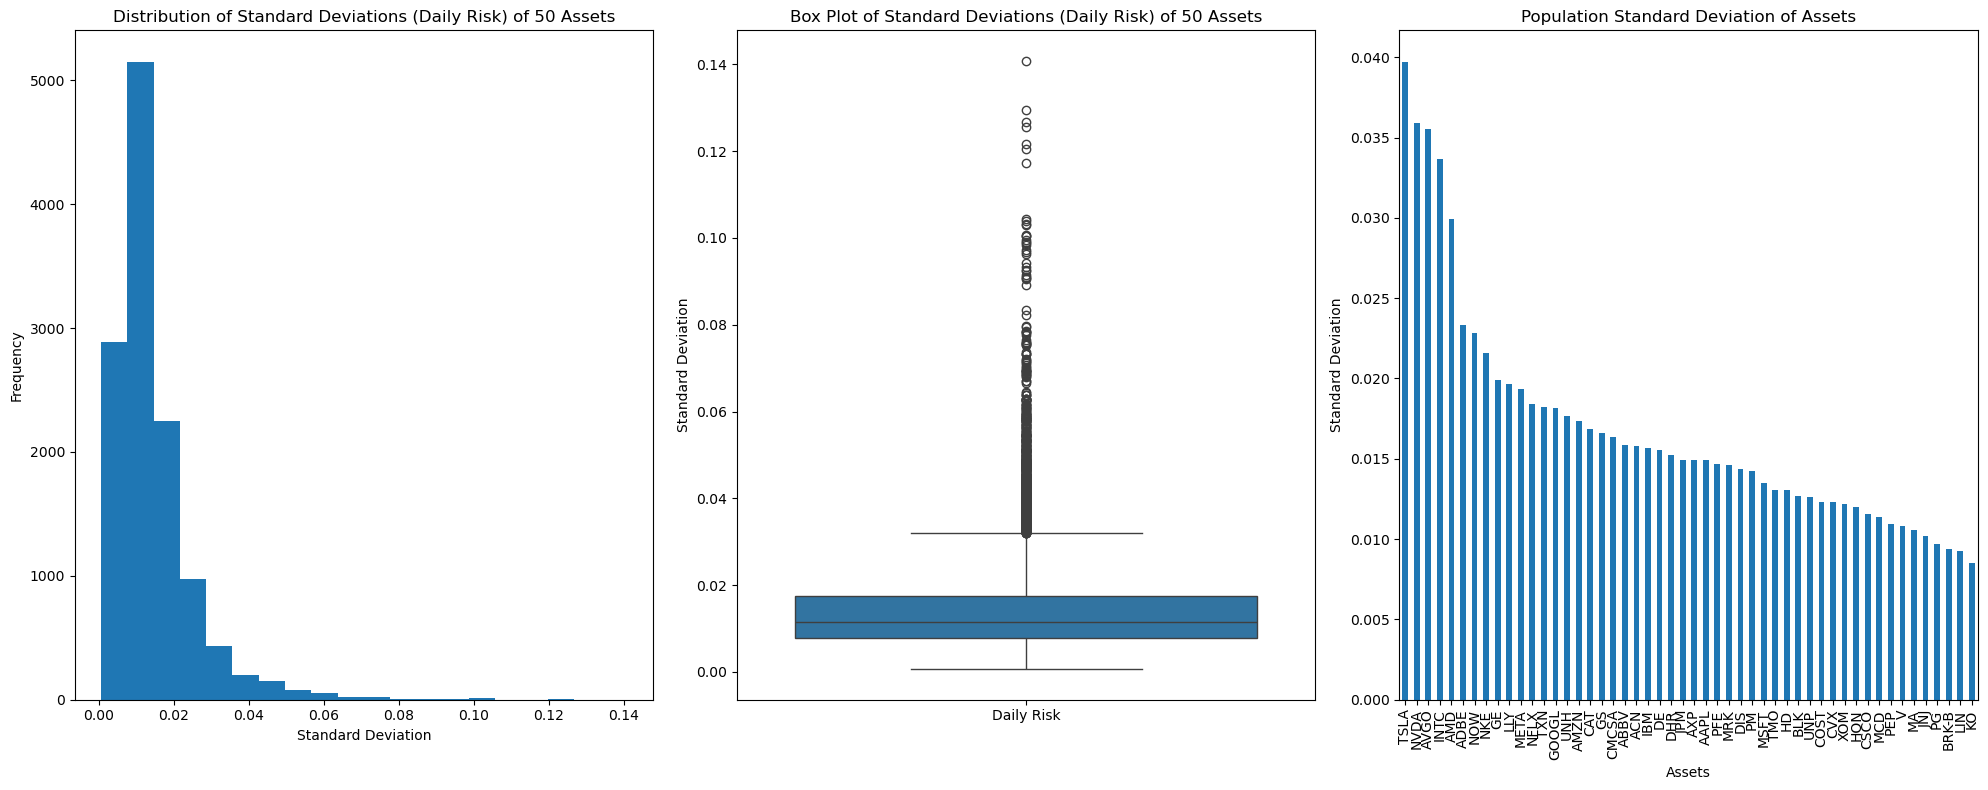

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(20, 8))
std_dev_entire = data['Log Returns'].std().sort_values(ascending=False)

axes[0].hist(rolling_std_dev.values.flatten(), bins=20)
axes[0].set_title('Distribution of Standard Deviations (Daily Risk) of 50 Assets')
axes[0].set_xlabel('Standard Deviation')
axes[0].set_ylabel('Frequency')

sns.boxplot(rolling_std_dev, ax=axes[1])
axes[1].set_title('Box Plot of Standard Deviations (Daily Risk) of 50 Assets')
axes[1].set_ylabel('Standard Deviation')

std_dev_entire.plot(kind='bar', ax=axes[2])
axes[2].set_title('Population Standard Deviation of Assets')
axes[2].set_xlabel('Assets')
axes[2].set_ylabel('Standard Deviation')

plt.tight_layout()
plt.show()

# Intuition
1. Most assets have low daily risk (standard deviation): The majority of the assets have relatively small variations in price, and thus their standard deviations are lower.

2. A few assets have high daily risk (standard deviation): There are some assets with much higher volatility, but these are fewer in number. These assets' returns deviate much more from their mean, which shows up as the right tail of the histogram.

The skewness in volatility should be accounted for during random portfolio generation. If randomly sampled from assets without considering skewness, you might create portfolios that are riskier than expected.
Give lower-risk assets a higher probability of selection, Instead of equal probability, adjust selection based on risk—low-volatility assets get chosen more often.

In [17]:
# Merge with the original dataframe
data = data.join(rolling_std_dev)

In [18]:
data['Daily Risk'].head(10)

,AAPL,ABBV,ACN,ADBE,AMD,AMZN,AVGO,AXP,BLK,BRK-B,...,PFE,PG,PM,TMO,TSLA,TXN,UNH,UNP,V,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2024-02-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-20,0.003842,0.008252,0.015620,0.031311,0.032087,0.013492,0.010908,0.007812,0.017966,0.007558,...,0.014961,0.006284,0.005962,0.011722,0.037367,0.017781,0.003670,0.012689,0.010292,0.015672
2024-02-21,0.004690,0.008769,0.014766,0.032261,0.031954,0.011513,0.010934,0.006000,0.007752,0.003628,...,0.005821,0.006110,0.005546,0.007998,0.034108,0.007723,0.003310,0.013849,0.010585,0.016511
2024-02-22,0.007638,0.009170,0.017239,0.031040,0.057112,0.019186,0.031648,0.008473,0.007794,0.004819,...,0.007195,0.004332,0.005505,0.006457,0.033316,0.007621,0.004206,0.012663,0.015292,0.015872
2024-02-23,0.008974,0.008085,0.018685,0.038932,0.058901,0.018272,0.032195,0.008050,0.006313,0.004438,...,0.004628,0.004253,0.003948,0.006159,0.020066,0.009953,0.003632,0.012861,0.014712,0.012018


In [19]:
data['Log Returns'].head(10)

,AAPL,ABBV,ACN,ADBE,AMD,AMZN,AVGO,AXP,BLK,BRK-B,...,PFE,PG,PM,TMO,TSLA,TXN,UNH,UNP,V,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2024-02-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-13,-0.011338,0.001270,-0.012654,-0.016396,-0.002155,-0.021703,-0.010609,-0.012277,-0.029993,-0.007344,...,-0.025262,-0.005361,-0.009041,-0.015220,-0.022089,-0.026611,-0.001527,-0.007262,0.002686,-0.008646
2024-02-14,-0.004821,0.006500,0.022269,0.004592,0.040892,0.013780,0.008409,0.005849,0.009377,0.009780,...,0.005178,-0.004104,0.000336,0.017795,0.025167,0.006482,0.000174,0.018156,0.006325,-0.004946
2024-02-15,-0.001576,0.012364,0.001428,-0.023798,-0.010916,-0.006925,0.002255,0.007699,0.015978,0.011894,...,0.014647,0.008828,-0.002694,0.000547,0.060353,0.017830,0.007593,0.001758,0.012246,0.028256
2024-02-16,-0.008466,0.005084,-0.005479,-0.077041,-0.016485,-0.001709,-0.015607,0.000141,-0.005088,0.006276,...,0.003990,0.003179,0.007501,-0.001332,-0.002498,-0.002055,0.001285,-0.015932,-0.008650,0.000000
2024-02-20,-0.004122,-0.009852,-0.017832,-0.008727,-0.048189,-0.014439,-0.015316,-0.000329,0.005163,0.002853,...,-0.001087,0.006329,-0.000111,0.000547,-0.031447,0.014608,-0.000940,0.002228,-0.012317,-0.009493
2024-02-21,0.004177,-0.003477,-0.005637,-0.006275,-0.008485,0.008997,0.000734,-0.007558,0.009155,0.005145,...,0.002895,0.011853,0.010321,0.008556,0.005199,0.008200,0.001745,0.016772,0.005834,0.020232
2024-02-22,0.011181,0.009151,0.028409,-0.001766,0.101604,0.034913,0.061188,0.014592,0.009871,0.014338,...,-0.004346,0.000997,0.006822,0.013725,0.013463,0.008194,0.008641,0.012613,0.024943,-0.000859
2024-02-23,-0.010085,0.007553,0.016056,0.029094,-0.029803,0.002346,-0.006559,0.002660,0.000184,0.004950,...,0.007594,0.002923,0.004049,0.007501,-0.027944,-0.010574,0.001404,0.009386,-0.000529,-0.008821


In [20]:
data.isnull().sum().sort_values(ascending=False)

Daily Risk  DIS      5
            DHR      5
            DE       5
            CVX      5
            CSCO     5
                    ..
High        COST     0
            CMCSA    0
            CAT      0
            BRK-B    0
            BLK      0
Length: 400, dtype: int64

---

# Cleaning Data and Preprocessing
- Its ideal to drop the missing values generated by the log returns and daily risk columns since using other methods like backward fill uses future data to estimate past values.(bfill may be useful when filling timestamps).
- Forward fill can be used but in this case the missing data is at the startof the dataset and not at the very end hence it can't work in this case.
- In this case the best approach may be to drop the missing values using dropna() ensuring all calculations start on a level playing field.

In [21]:
# Drop rows with missing data
data = data.dropna()

In [22]:
data.isnull().sum().sort_values(ascending=False)

Daily Risk  MRK     0
            META    0
            MCD     0
            MA      0
            LLY     0
                   ..
Adj Close   AMD     0
            ADBE    0
            ACN     0
            ABBV    0
            AAPL    0
Length: 400, dtype: int64

In [23]:
data.describe()

Adj Close                                                              \
             AAPL        ABBV         ACN        ADBE         AMD        AMZN   
count  245.000000  245.000000  245.000000  245.000000  245.000000  245.000000   
mean   212.124165  175.462444  338.133443  504.599795  152.669388  192.820245   
std     25.907155   12.470754   28.413005   43.595013   21.170844   19.322664   
min    164.224564  150.744324  279.392517  405.920013  107.559998  161.020004   
25%    189.084518  165.245148  313.344788  475.429993  138.440002  179.539993   
50%    222.230896  173.699997  340.811249  504.399994  154.020004  186.380005   
75%    229.594696  187.878265  360.771515  539.789978  165.139999  201.449997   
max    258.735504  201.965424  398.250000  586.549988  211.380005  242.059998   

                                                        ...  Daily Risk  \
             AVGO         AXP          BLK       BRK-B  ...         PFE   
count  245.000000  245.000000   245.000000  245.000000  ...  245.000000   
mean   164.441931  256.698777   884.588381  437.042450  ...    0.013491   
std     33.170866   32.245190   106.747369   25.641870  ...    0.006093   
min    119.376144  208.577591   734.400391  396.730011  ...    0.002720   
25%    136.748825  230.603546   788.450989  410.239990  ...    0.009371   
50%    162.796936  247.967514   855.911438  441.820007  ...    0.012492   
75%    176.167984  286.147247   995.878479  459.609985  ...    0.016926   
max    249.331955  325.869995  1075.500000  483.079987  ...    0.035066   

                                                                               \
               PG          PM         TMO        TSLA         TXN         UNH   
count  245.000000  245.000000  245.000000  245.000000  245.000000  245.000000   
mean     0.008525    0.010978    0.011213    0.035517    0.017060    0.014647   
std      0.004932    0.008249    0.005871    0.017584    0.008079    0.009530   
min      0.002063    0.002052    0.002581    0.004350    0.003161    0.003050   
25%      0.005192    0.006362    0.006981    0.023825    0.011020    0.008202   
50%      0.007226    0.008957    0.010398    0.031902    0.015194    0.011458   
75%      0.010832    0.012906    0.013283    0.043229    0.021450    0.019743   
max      0.032454    0.048569    0.038211    0.094121    0.043069    0.044453   

                                           
              UNP           V         XOM  
count  245.000000  245.000000  245.000000  
mean     0.011216    0.009632    0.011169  
std      0.005750    0.004896    0.004715  
min      0.002730    0.002522    0.001564  
25%      0.007310    0.006554    0.007599  
50%      0.010255    0.008452    0.010623  
75%      0.013849    0.010585    0.014737  
max      0.033318    0.029542    0.022706  

[8 rows x 400 columns]

In [24]:
data.columns.get_level_values(0).unique()

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume', 'Log Returns',
       'Daily Risk'],
      dtype='object')

In [25]:
data.shape

(245, 400)

---
# Generate random Weights

In [26]:
n_assets = 50  # Number of assets
n_portfolios = 1000  # Number of random portfolios

# Initialize an empty array to store portfolio weights
random_portfolios = np.zeros((n_portfolios, n_assets))

random_portfolios.shape

(1000, 50)

In [27]:
for i in range(n_portfolios):
    weights = np.random.rand(n_assets)  # Generate random values
    # Normalize to sum to 1, This divides each element by the sum of all elements, it is the shorthand for weights = weights / np.sum(weights)
    weights /= np.sum(weights)  
    # copies the weights array into the i-th row of random_portfolios.
    random_portfolios[i] = weights  

# Check if all portfolios sum to 1
print(random_portfolios[:5], np.sum(random_portfolios, axis=1)[:5])  # Show first 5 portfolios

[[3.55519889e-02 3.18183296e-02 1.27423165e-02 2.92793451e-02
  3.84681956e-02 2.83379699e-02 1.24379583e-02 1.01748447e-02
  4.51543850e-04 1.91704960e-03 1.33327666e-02 2.61384928e-02
  3.40102697e-02 9.88047914e-03 1.73315551e-02 1.02984682e-02
  1.50515637e-02 3.07620645e-02 2.35323250e-02 1.04425331e-02
  1.35965116e-02 3.91945687e-02 1.09426598e-03 3.64299647e-03
  1.71958461e-02 3.50668419e-02 5.57735085e-03 1.66420518e-02
  1.34888096e-03 4.35505471e-03 2.38824705e-03 3.97963157e-02
  4.13805699e-02 3.31029135e-02 2.02973069e-02 4.63412076e-03
  3.84351145e-02 1.68544834e-03 1.31757441e-02 6.16864911e-03
  6.90030821e-04 7.49359383e-03 4.10532921e-02 1.78798400e-02
  3.61064748e-02 1.64872814e-04 4.35491138e-02 3.88003121e-02
  3.99275767e-02 4.35960344e-02]
 [1.22257094e-02 2.45229174e-02 8.79344527e-03 4.14658084e-02
  1.72168010e-02 3.25343865e-02 2.68369184e-02 4.89398571e-03
  2.81923365e-02 2.57113330e-02 2.56879483e-02 2.54802330e-02
  4.19316980e-02 5.06344043e-03 1.826

---
# Simulate Portfolio Performance
1. Calculate expected returns. 
    - $E(R_p)=\sum_{i=1}^{n} w_i .E(R_i)$
    - where $E(R_i) = \frac{1}{n}\sum_{i=1}^{n}\text{Log Returns}$
2. Calculate expected risk (volatility).
    - $\sigma_p = \sqrt{\sum_{i=1}^{N}w_i^2 \sigma_i^2 + \sum_{\substack{j=i \\ j \neg i}}^{n}w_i.w_j.\text{cov}(R_i,R_j)}$
    - The first sum accounts for the variances of individual assets $(\sigma_i^2)$ weighted by $(w_i^2)$
    - The second sum accounts for covariances between different assets $(\text{cov}(R_i,R_j))$, weighted by $w_i, w_j$
3. Calculate covariance.
    - $\text{cov}(R_i,R_j) = \frac{1}{N - 1}\sum_{n=1}^{N}(R_\text{i,n} - \bar{R_i})(R_\text{j,n} - \bar{R_j})$

In [28]:
# Calculate expected returns of individual assets
expected_returns = data['Log Returns'].mean()
expected_returns.shape

(50,)

In [41]:
print(expected_returns)

AAPL     0.000926
ABBV     0.000431
ACN      0.000238
ADBE    -0.000784
AMD     -0.001851
AMZN     0.001301
AVGO     0.002647
AXP      0.001589
BLK      0.000978
BRK-B    0.000599
CAT      0.000554
CMCSA   -0.000604
COST     0.001586
CSCO     0.001187
CVX      0.000158
DE       0.001141
DHR     -0.000822
DIS     -0.000049
GE       0.002250
GOOGL    0.001170
GS       0.002245
HD       0.000643
HON      0.000315
IBM      0.001294
INTC    -0.003177
JNJ      0.000036
JPM      0.001785
KO       0.000463
LIN      0.000317
LLY      0.000449
MA       0.000794
MCD      0.000321
META     0.001713
MRK     -0.001488
MSFT     0.000104
NFLX     0.002307
NKE     -0.001473
NOW      0.001181
NVDA     0.002489
PEP     -0.000450
PFE     -0.000019
PG       0.000351
PM       0.002206
TMO      0.000048
TSLA     0.002294
TXN      0.000591
UNH      0.000155
UNP      0.000052
V        0.000970
XOM      0.000375
dtype: float64


- random_portfolios is a (1000 × num_assets) matrix, where each row is a different portfolio’s weights.
- expected_returns is a (num_assets × 1) column vector of asset expected returns.
- The @ operator performs matrix multiplication, resulting in a (1000 × 1) array, where each row is the expected return of a portfolio.

In [29]:
portfolio_expected_returns = random_portfolios @ expected_returns
portfolio_expected_returns.shape

(1000,)

In [40]:
print(portfolio_expected_returns)

[0.00045877 0.00063743 0.00059807 0.00058352 0.0006629  0.00047811
 0.00053074 0.00061366 0.00061695 0.00047116 0.00046414 0.00062353
 0.00062851 0.00050464 0.00067877 0.00067384 0.00055368 0.00051278
 0.0005514  0.00071087 0.00060453 0.00046806 0.00070075 0.00064608
 0.00070318 0.00071732 0.00054857 0.0005404  0.00077582 0.00073961
 0.00041531 0.00066073 0.00060683 0.0006934  0.00057862 0.00043931
 0.00067345 0.00077    0.00071045 0.00059323 0.00064387 0.00053772
 0.00068172 0.00063563 0.00055385 0.00070594 0.000443   0.00053814
 0.00068335 0.0005245  0.00062348 0.00059592 0.00053861 0.00060379
 0.000413   0.00053075 0.00061376 0.00050136 0.00050938 0.00086291
 0.00065093 0.00050911 0.00054902 0.00074827 0.00047471 0.00061807
 0.00075128 0.00065995 0.0007079  0.00068573 0.00048406 0.00063508
 0.00042771 0.00069277 0.00060329 0.0004919  0.00058428 0.00056302
 0.00064825 0.00059662 0.00056109 0.00066427 0.00053004 0.00066929
 0.00082007 0.00074341 0.00054983 0.00060064 0.00057364 0.0005

In [38]:
cov_matrix = data['Log Returns'].cov()
cov_matrix.head()

,AAPL,ABBV,ACN,ADBE,AMD,AMZN,AVGO,AXP,BLK,BRK-B,...,PFE,PG,PM,TMO,TSLA,TXN,UNH,UNP,V,XOM
AAPL,0.000225,-0.000003,0.000037,0.000059,0.000121,9.052842e-05,0.000126,0.000023,0.000054,0.000027,...,0.000018,-0.000003,0.000010,0.000007,0.000220,0.000075,9.300008e-07,0.000008,0.000021,1.399365e-06
ABBV,-0.000003,0.000255,0.000010,0.000028,-0.000043,1.598923e-07,-0.000042,0.000023,0.000017,0.000034,...,0.000072,0.000038,0.000061,0.000062,-0.000084,0.000012,4.241352e-05,0.000039,0.000031,4.205324e-05
ACN,0.000037,0.000010,0.000252,0.000106,0.000078,6.766205e-05,0.000035,0.000047,0.000029,0.000040,...,0.000034,0.000017,0.000007,0.000045,0.000029,0.000041,4.134166e-05,0.000047,0.000049,-3.018283e-08
ADBE,0.000059,0.000028,0.000106,0.000527,0.000100,1.570271e-04,0.000189,0.000077,0.000049,0.000037,...,0.000010,-0.000009,0.000004,0.000046,0.000139,0.000062,3.662987e-05,0.000045,0.000052,6.177643e-06
AMD,0.000121,-0.000043,0.000078,0.000100,0.000903,1.830832e-04,0.000526,0.000101,0.000105,0.000024,...,-0.000023,-0.000042,-0.000043,0.000025,0.000377,0.000262,6.365032e-06,0.000039,0.000027,2.863032e-05
